In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/online-sales-data/Online Sales Data.csv


**1. LOADING THE DATASET INTO THE PANDAS DATAFRAME** 

In [2]:
data = pd.read_csv("/kaggle/input/online-sales-data/Online Sales Data.csv")
df = pd.DataFrame(data)
print(df.head(10))

   Transaction ID        Date Product Category                 Product Name  \
0           10001  2024-01-01      Electronics                iPhone 14 Pro   
1           10002  2024-01-02  Home Appliances             Dyson V11 Vacuum   
2           10003  2024-01-03         Clothing             Levi's 501 Jeans   
3           10004  2024-01-04            Books            The Da Vinci Code   
4           10005  2024-01-05  Beauty Products      Neutrogena Skincare Set   
5           10006  2024-01-06           Sports  Wilson Evolution Basketball   
6           10007  2024-01-07      Electronics          MacBook Pro 16-inch   
7           10008  2024-01-08  Home Appliances         Blueair Classic 480i   
8           10009  2024-01-09         Clothing             Nike Air Force 1   
9           10010  2024-01-10            Books        Dune by Frank Herbert   

   Units Sold  Unit Price  Total Revenue         Region Payment Method  
0           2      999.99        1999.98  North America  

**2. DATA CLEANING**

* Handling the missing values
* Correcting the data types
* Removing the duplicated Data

In [3]:
df = df.drop_duplicates()
print(df.isnull().sum())
df['Date']= pd.to_datetime(df['Date'])
print(df.dtypes)


Transaction ID      0
Date                0
Product Category    0
Product Name        0
Units Sold          0
Unit Price          0
Total Revenue       0
Region              0
Payment Method      0
dtype: int64
Transaction ID               int64
Date                datetime64[ns]
Product Category            object
Product Name                object
Units Sold                   int64
Unit Price                 float64
Total Revenue              float64
Region                      object
Payment Method              object
dtype: object


**3. DATA EXPLORATION**

* Understanding the structure of the dataset

In [4]:
print(df.describe())
print("\n")
print(df.columns)
print("\n")
print(df['Product Category'].value_counts(ascending=False))
print("\n")
print(df['Product Name'].value_counts(ascending=False))
print("\n")
print(df.nunique())


       Transaction ID                 Date  Units Sold   Unit Price  \
count       240.00000                  240  240.000000   240.000000   
mean      10120.50000  2024-04-29 12:00:00    2.158333   236.395583   
min       10001.00000  2024-01-01 00:00:00    1.000000     6.500000   
25%       10060.75000  2024-02-29 18:00:00    1.000000    29.500000   
50%       10120.50000  2024-04-29 12:00:00    2.000000    89.990000   
75%       10180.25000  2024-06-28 06:00:00    3.000000   249.990000   
max       10240.00000  2024-08-27 00:00:00   10.000000  3899.990000   
std          69.42622                  NaN    1.322454   429.446695   

       Total Revenue  
count     240.000000  
mean      335.699375  
min         6.500000  
25%        62.965000  
50%       179.970000  
75%       399.225000  
max      3899.990000  
std       485.804469  


Index(['Transaction ID', 'Date', 'Product Category', 'Product Name',
       'Units Sold', 'Unit Price', 'Total Revenue', 'Region',
       'Payment Meth

**4. DATA VISULAIZATION**

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


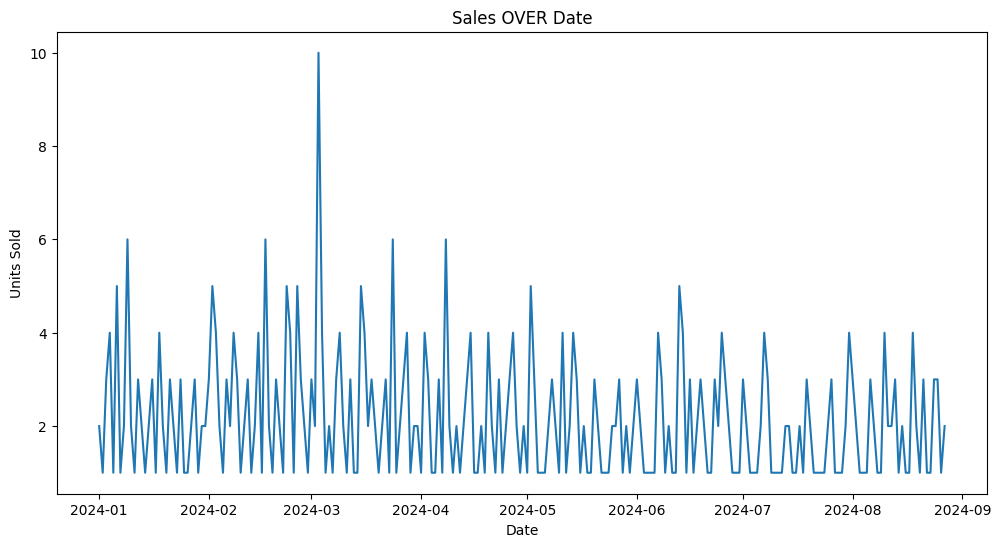

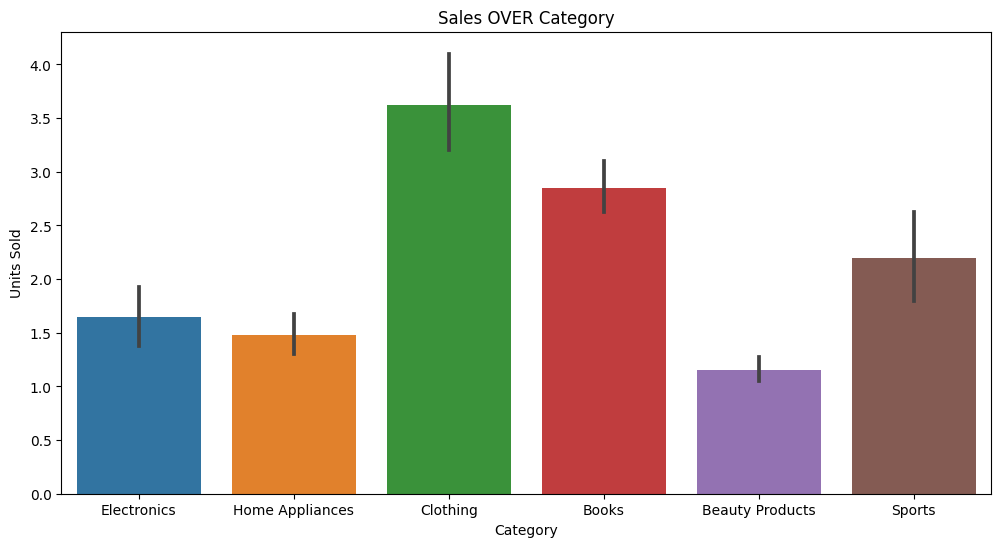

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


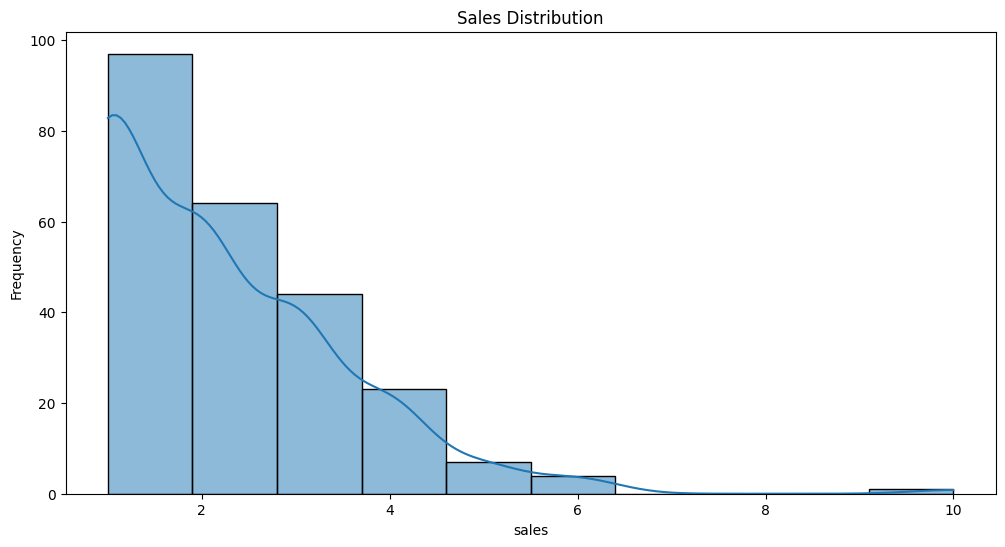

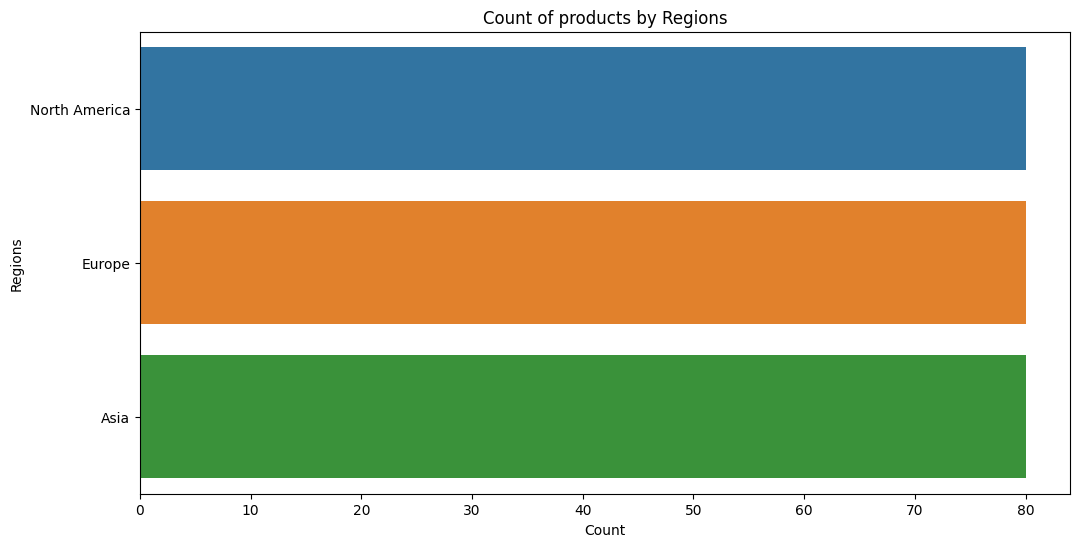

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(12,6))
sns.lineplot(data = df, x='Date', y='Units Sold')
plt.title('Sales OVER Date')
plt.xlabel('Date')
plt.ylabel('Units Sold')
plt.show()

plt.figure(figsize=(12,6))
sns.barplot(data=df, x='Product Category', y='Units Sold')
plt.title('Sales OVER Category')
plt.xlabel('Category')
plt.ylabel('Units Sold')
plt.show()

plt.figure(figsize=(12,6))
sns.histplot(df['Units Sold'], bins=10, kde=True)
plt.title('Sales Distribution')
plt.xlabel('sales')
plt.ylabel('Frequency')
plt.show()

plt.figure(figsize=(12,6))
sns.countplot(data=df, y='Region',order = df['Region'].value_counts().index)
plt.title('Count of products by Regions')
plt.xlabel('Count')
plt.ylabel('Regions')
plt.show()